In [63]:
import pandas as pd
crime_df=pd.read_csv("/Users/admin/Downloads/crimedata2.csv", encoding="ISO-8859-1")
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [64]:
crime_df.head

<bound method NDFrame.head of                Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          ?             ?     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA          ?             ?    10   
2211            Pinevillecity    LA          ?             ?    10   
2212              Yucaipacity    CA          ?             ?    10   
2213             Beevillecity    TX          ?             ?    10   
2214       WestSacramentocity    CA          ?             ?    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37       

In [65]:
# List of features (column names) to keep
selected_columns = [
    # Economic Indicators
    'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 
    'pctWPubAsst', 'pctWRetire', 'perCapInc', 'PctPopUnderPov', 
    'PctUnemployed', 'PctEmploy', 'RentLowQ', 'RentMedian', 'RentHighQ',

    # Education & Employment
    'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmplManu', 
    'PctEmplProfServ', 'PctOccupMgmtProf',

    # Housing & Infrastructure
    'OwnOccMedVal', 'PctHousLess3BR', 'PctVacantBoarded', 'PctHousNoPhone', 
    'PctWOFullPlumb',

    # Demographic & Location Factors
    'PopDens', 'pctUrban', 'PctForeignBorn', 'PctSpeakEnglOnly', 
    'PctNotSpeakEnglWell',

    # Police & Crime-Related Features
    'PolicPerPop', 'PolicBudgPerPop',

    # Target
    'burglPerPop']

# Create a new DataFrame with the selected columns
filtered_df = crime_df[selected_columns]

In [55]:
filtered_df.head

<bound method NDFrame.head of       medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  \
0         75122     89.24          1.55       70.20       23.62         1.03   
1         47917     78.99          1.11       64.11       35.50         2.75   
2         35669     82.00          1.15       55.73       22.25         2.94   
3         20580     68.15          0.24       38.95       39.48        11.71   
4         17390     69.33          0.55       42.82       32.16        11.21   
...         ...       ...           ...         ...         ...          ...   
2210      24727     75.05          1.12       31.42       21.45        19.98   
2211      20321     75.06          0.47       33.25       27.63         8.85   
2212      27182     59.79          0.51       44.72       43.40         9.01   
2213      19899     71.67          1.70       21.94       26.44        13.05   
2214      23287     68.89          1.20       27.54       28.62        19.05   

      pct

/var/folders/yh/pn_fkx4s3pb8025v71_9txc00000gp/T/ipykernel_77109/1464417882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


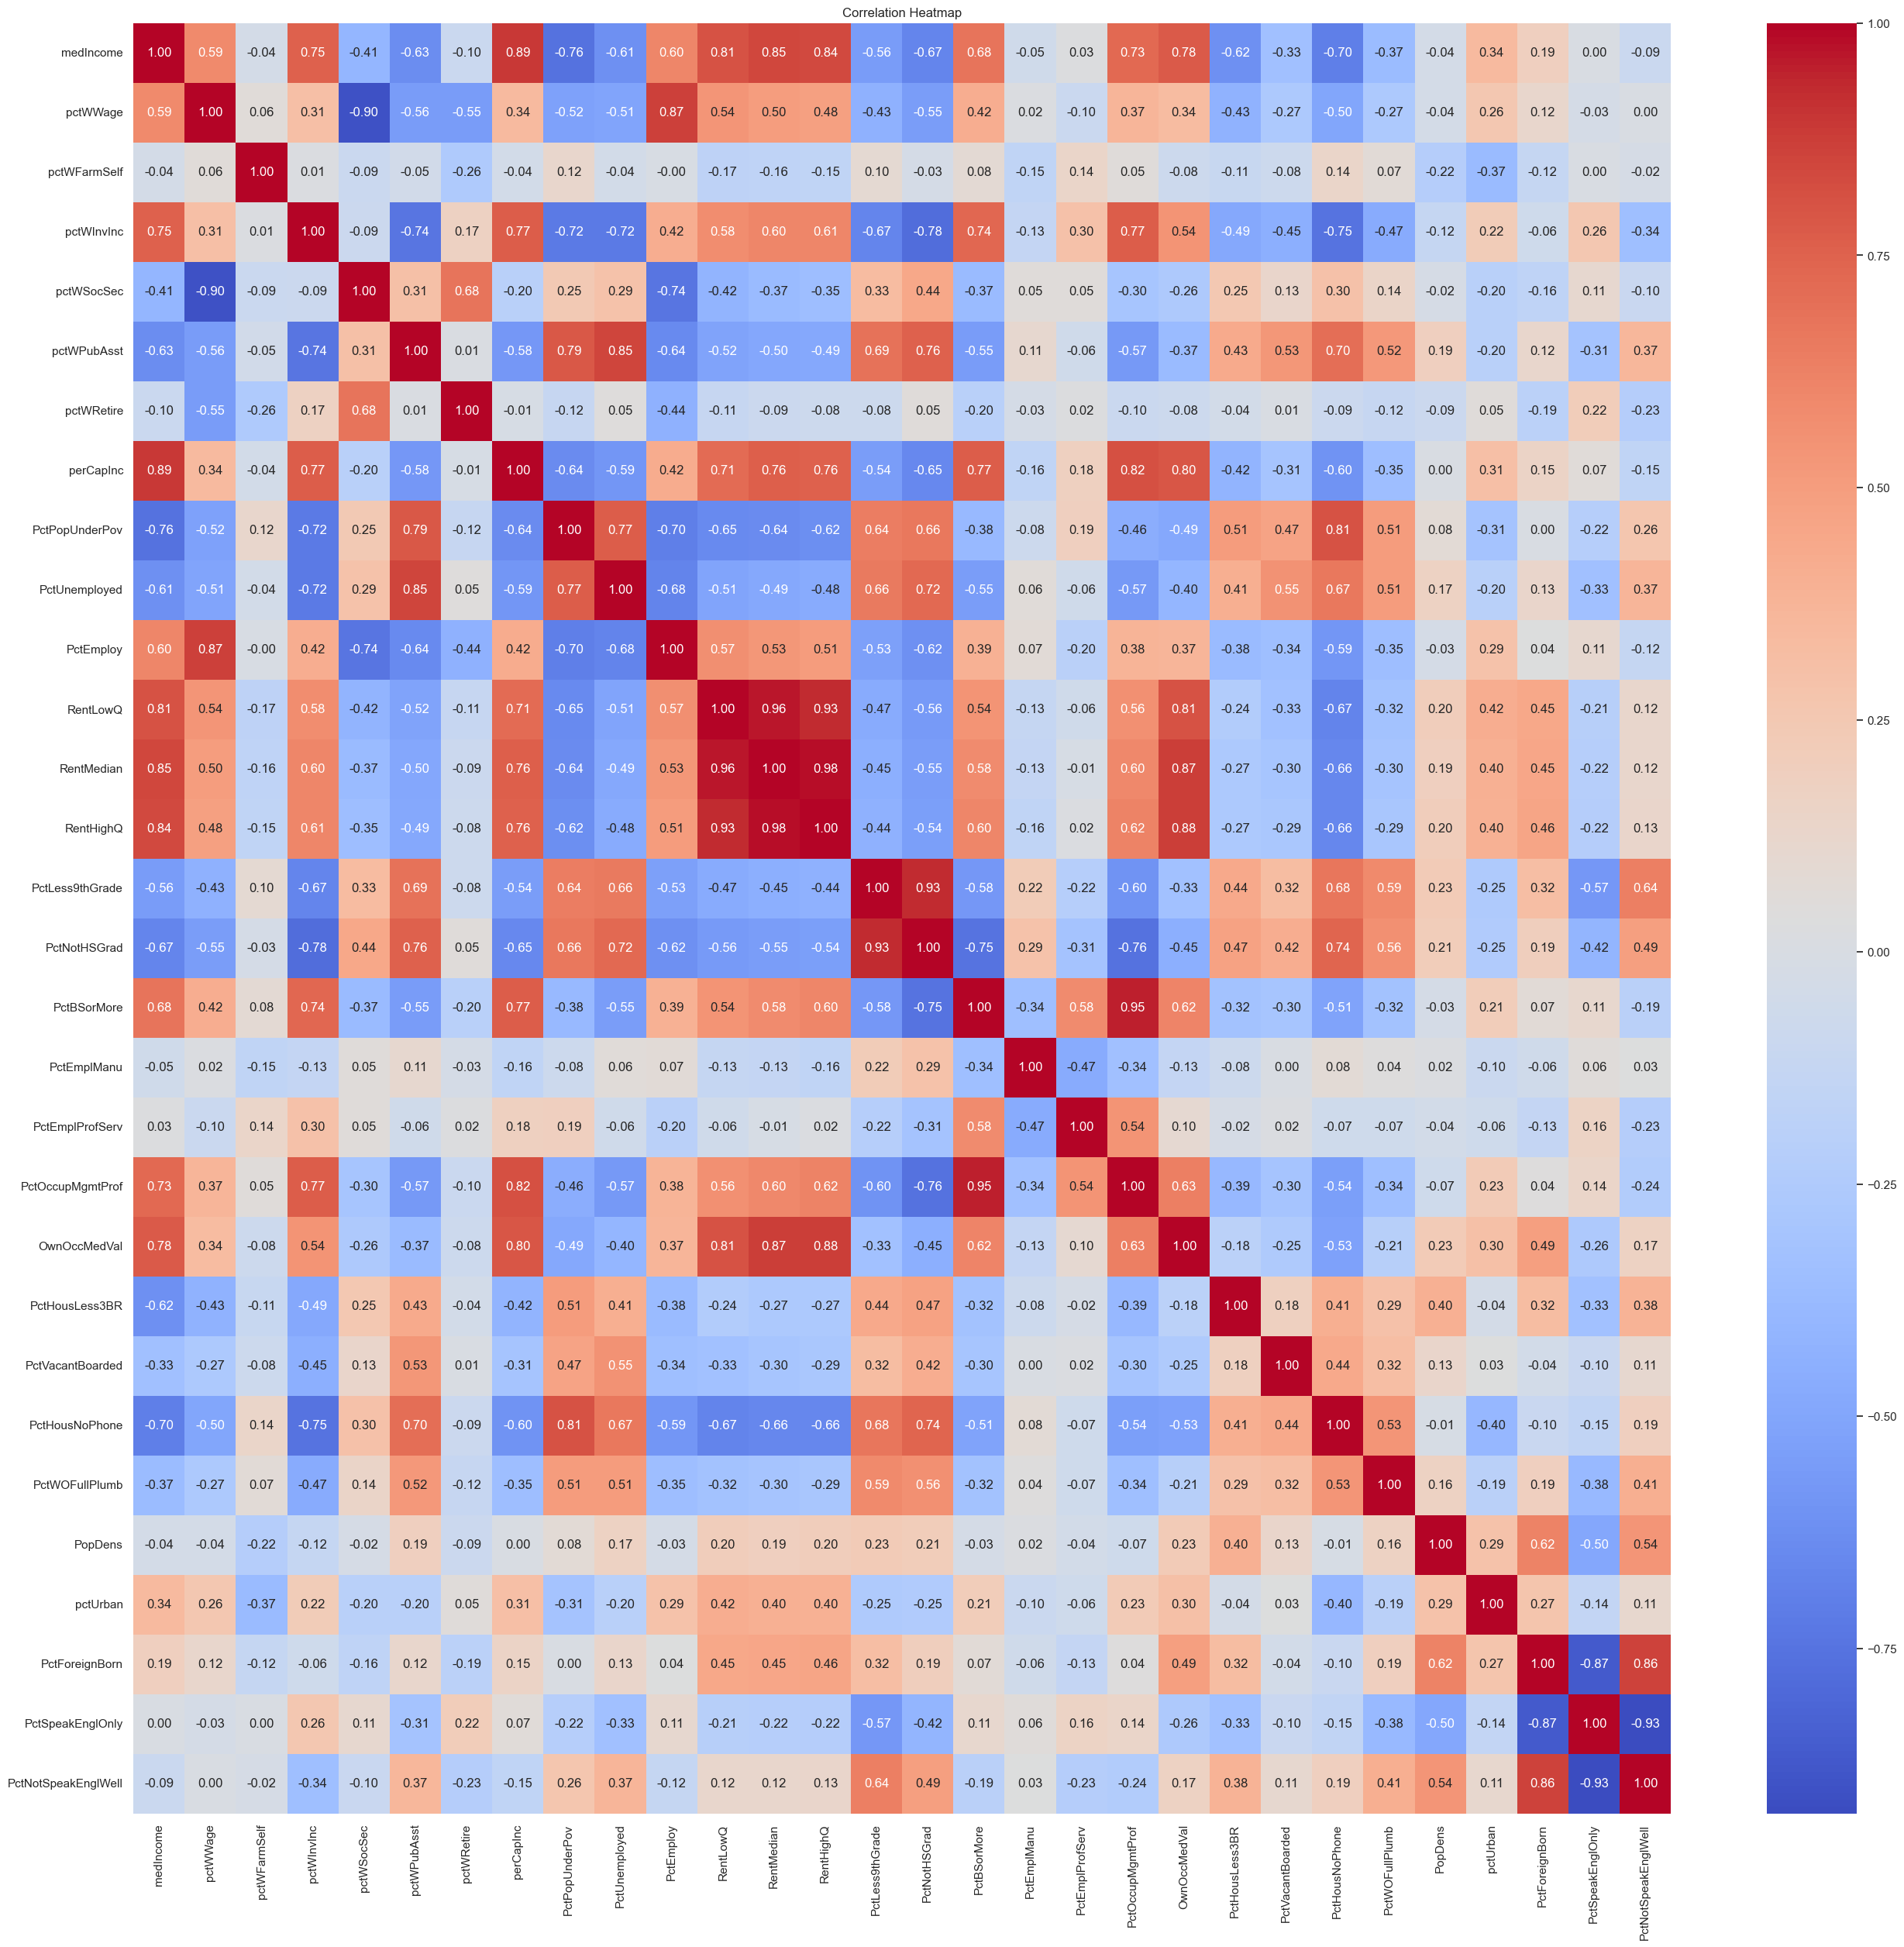

In [66]:
# Compute the correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(32, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [67]:
# Get the number of nulls in each column of filtered_df
null_counts = filtered_df.isnull().sum()

# Print the result
print(null_counts)


medIncome              0
pctWWage               0
pctWFarmSelf           0
pctWInvInc             0
pctWSocSec             0
pctWPubAsst            0
pctWRetire             0
perCapInc              0
PctPopUnderPov         0
PctUnemployed          0
PctEmploy              0
RentLowQ               0
RentMedian             0
RentHighQ              0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctEmplManu            0
PctEmplProfServ        0
PctOccupMgmtProf       0
OwnOccMedVal           0
PctHousLess3BR         0
PctVacantBoarded       0
PctHousNoPhone         0
PctWOFullPlumb         0
PopDens                0
pctUrban               0
PctForeignBorn         0
PctSpeakEnglOnly       0
PctNotSpeakEnglWell    0
PolicPerPop            0
PolicBudgPerPop        0
burglPerPop            0
dtype: int64


In [68]:
print(filtered_df[['PolicPerPop', 'PolicBudgPerPop', 'burglPerPop']].isna().sum())


PolicPerPop        0
PolicBudgPerPop    0
burglPerPop        0
dtype: int64


In [69]:
print(filtered_df[['PolicPerPop', 'PolicBudgPerPop', 'burglPerPop']].dtypes)


PolicPerPop        object
PolicBudgPerPop    object
burglPerPop        object
dtype: object


In [70]:
filtered_df['PolicPerPop'] = pd.to_numeric(filtered_df['PolicPerPop'], errors='coerce')
filtered_df['PolicBudgPerPop'] = pd.to_numeric(filtered_df['PolicBudgPerPop'], errors='coerce')
filtered_df['burglPerPop'] = pd.to_numeric(filtered_df['burglPerPop'], errors='coerce')

/var/folders/yh/pn_fkx4s3pb8025v71_9txc00000gp/T/ipykernel_77109/2704292105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PolicPerPop'] = pd.to_numeric(filtered_df['PolicPerPop'], errors='coerce')
/var/folders/yh/pn_fkx4s3pb8025v71_9txc00000gp/T/ipykernel_77109/2704292105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PolicBudgPerPop'] = pd.to_numeric(filtered_df['PolicBudgPerPop'], errors='coerce')
/var/folders/yh/pn_fkx4s3pb8025v71_9txc00000gp/T/ipykernel_77109/2704292

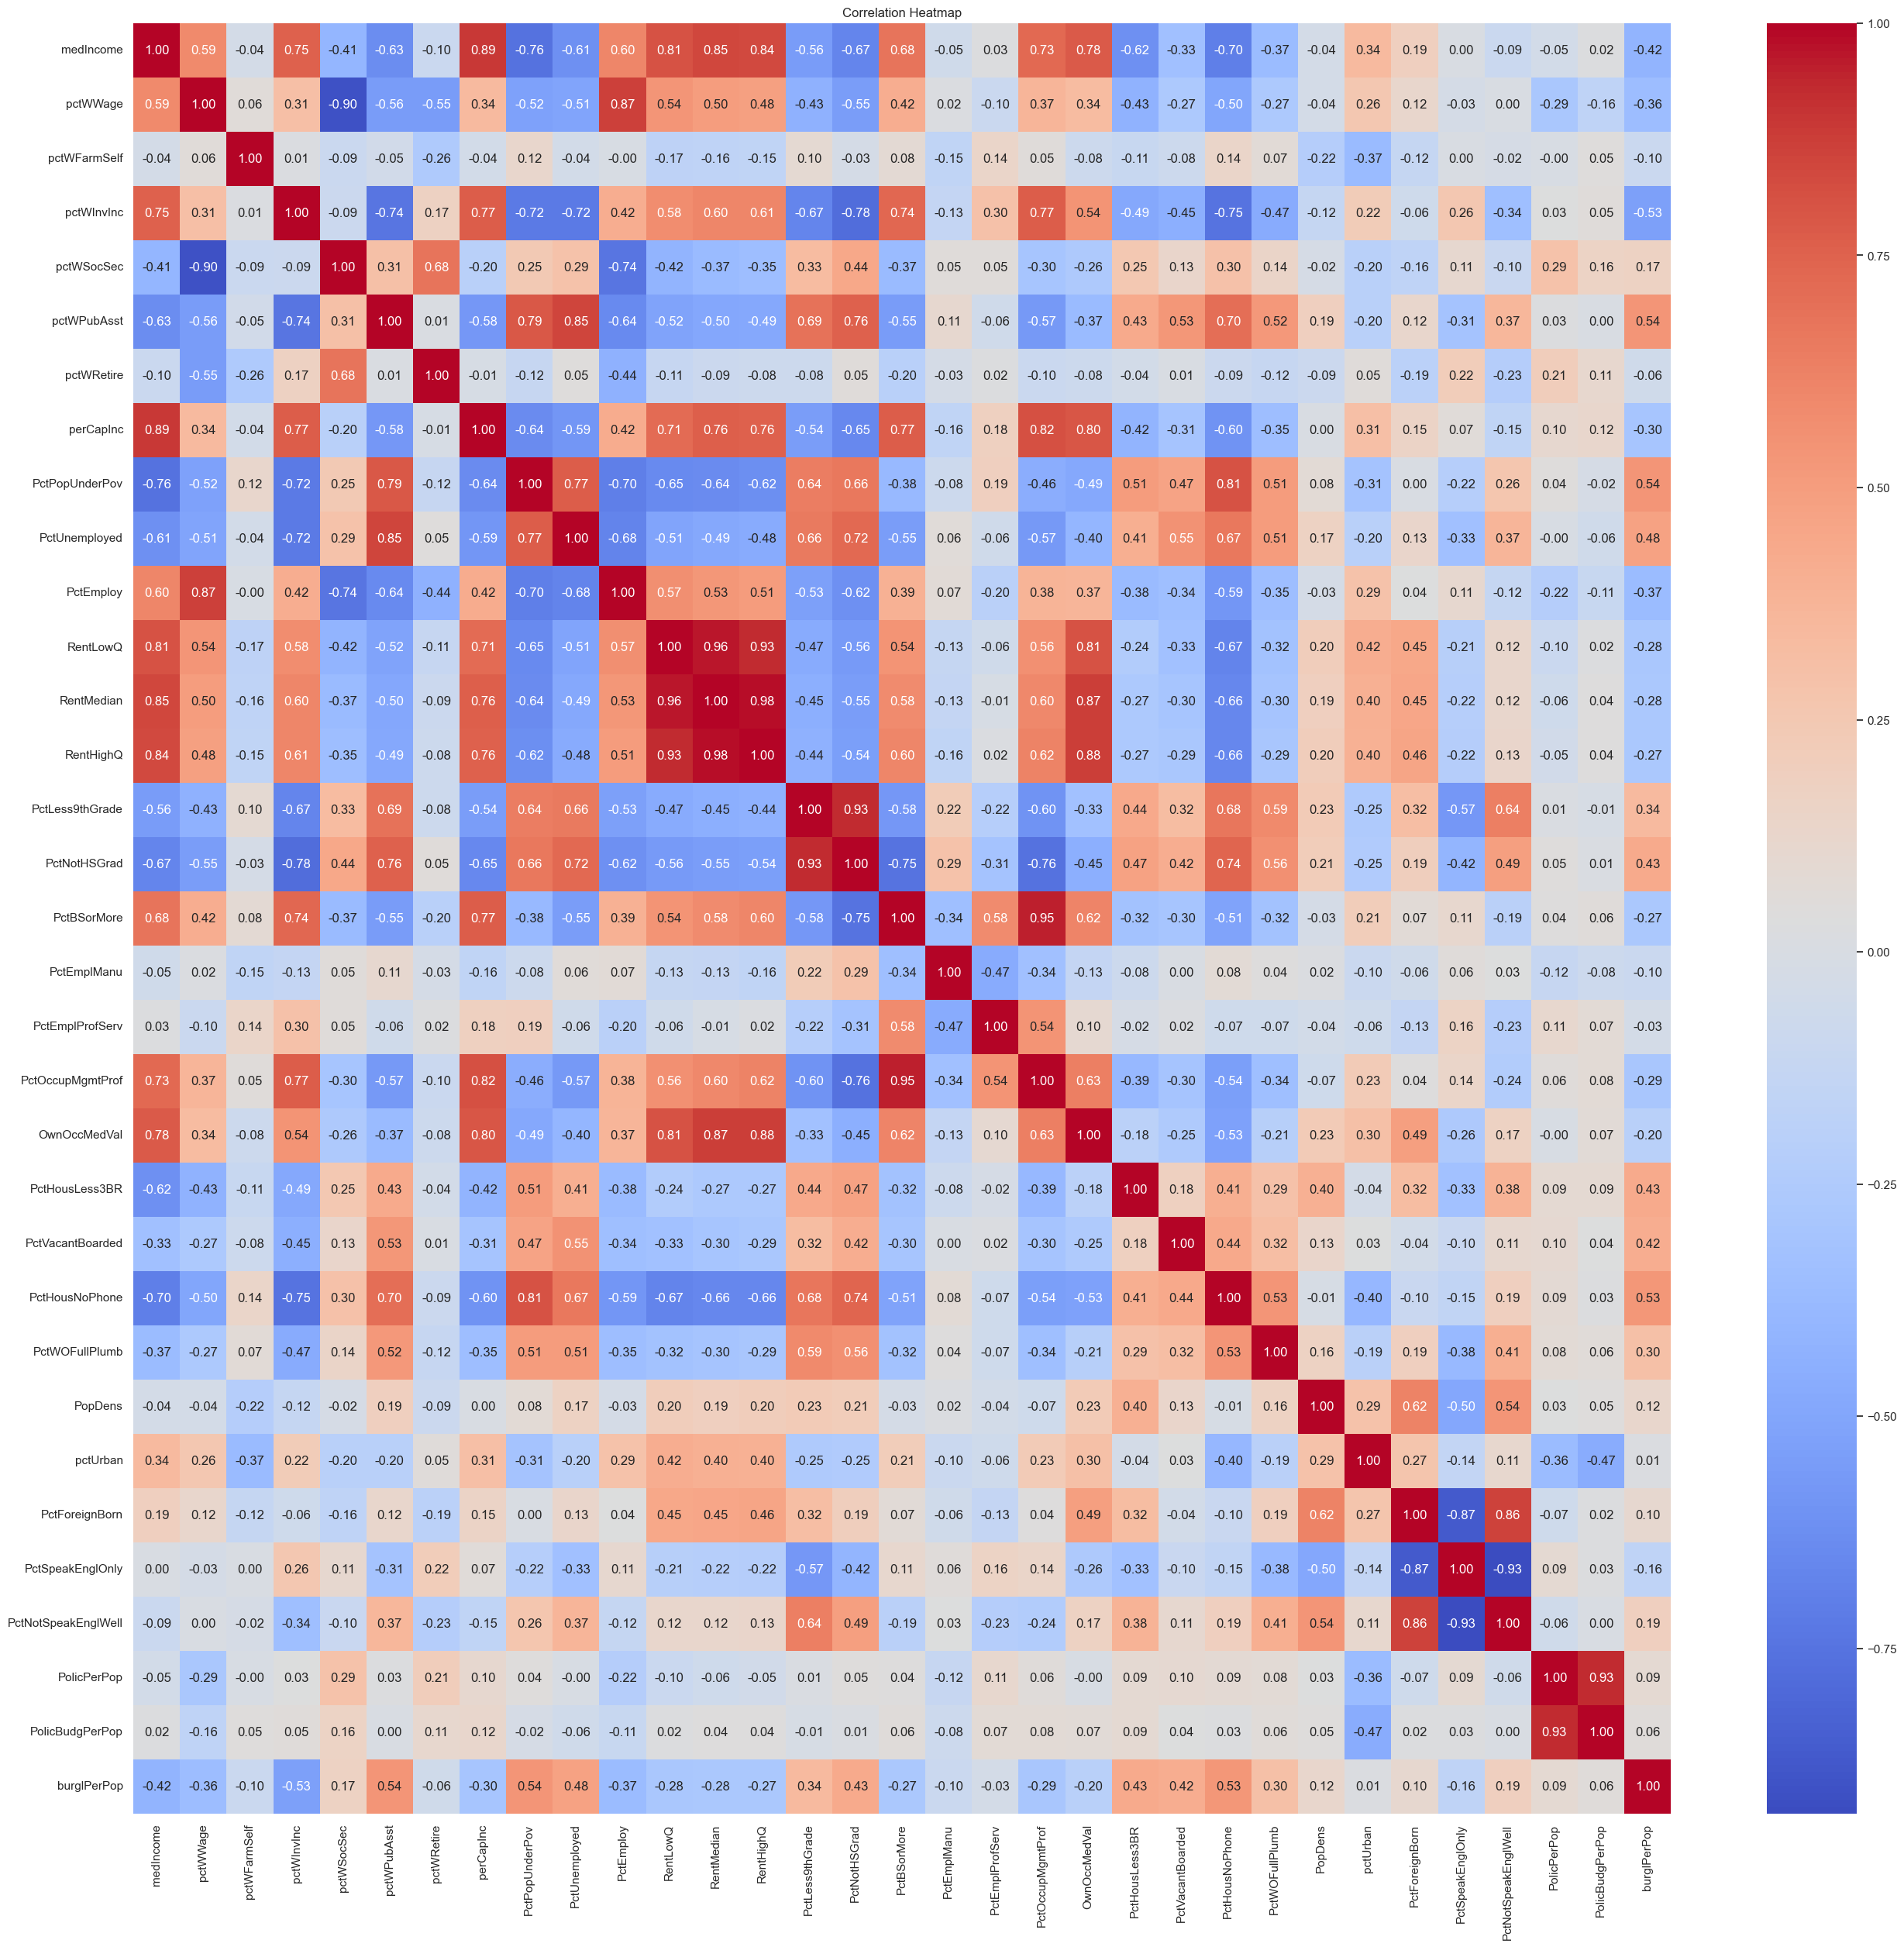

In [71]:
# Compute the correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(32, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [72]:
# Get the list of columns to include
columns_to_include = filtered_corr.index.tolist()

# Create the new DataFrame with filtered columns
filtered_df = filtered_df[columns_to_include]

# Optionally, you can also include 'burglPerPop' if it's not already in columns_to_include
if 'burglPerPop' not in columns_to_include:
    filtered_df = pd.concat([filtered_df, df[['burglPerPop']]], axis=1)


In [73]:
# Get the correlation series with 'burglPerPop'
correlation_with_burglPerPop = correlation_matrix['burglPerPop']

# Filter based on absolute value
filtered_corr = correlation_with_burglPerPop[abs(correlation_with_burglPerPop) >= 0.5]
print(filtered_corr)

pctWInvInc       -0.530237
pctWPubAsst       0.537846
PctPopUnderPov    0.540098
PctHousNoPhone    0.527630
burglPerPop       1.000000
Name: burglPerPop, dtype: float64


In [74]:
filtered_corr_matrix = filtered_df.corr()
print(filtered_corr_matrix)


                  medIncome  pctWWage  pctWInvInc  pctWPubAsst  perCapInc  \
medIncome          1.000000  0.588063    0.752887    -0.633009   0.891601   
pctWWage           0.588063  1.000000    0.314152    -0.556863   0.341133   
pctWInvInc         0.752887  0.314152    1.000000    -0.743427   0.774080   
pctWPubAsst       -0.633009 -0.556863   -0.743427     1.000000  -0.580153   
perCapInc          0.891601  0.341133    0.774080    -0.580153   1.000000   
PctPopUnderPov    -0.758372 -0.522483   -0.716797     0.788351  -0.637168   
PctUnemployed     -0.614694 -0.511972   -0.717577     0.852221  -0.586014   
PctEmploy          0.602716  0.870658    0.417069    -0.644942   0.423052   
RentLowQ           0.805163  0.538341    0.577558    -0.518926   0.714970   
RentMedian         0.847176  0.500283    0.601881    -0.496736   0.764667   
RentHighQ          0.839553  0.483212    0.607994    -0.487614   0.758891   
PctLess9thGrade   -0.557086 -0.433525   -0.665737     0.688920  -0.543935   

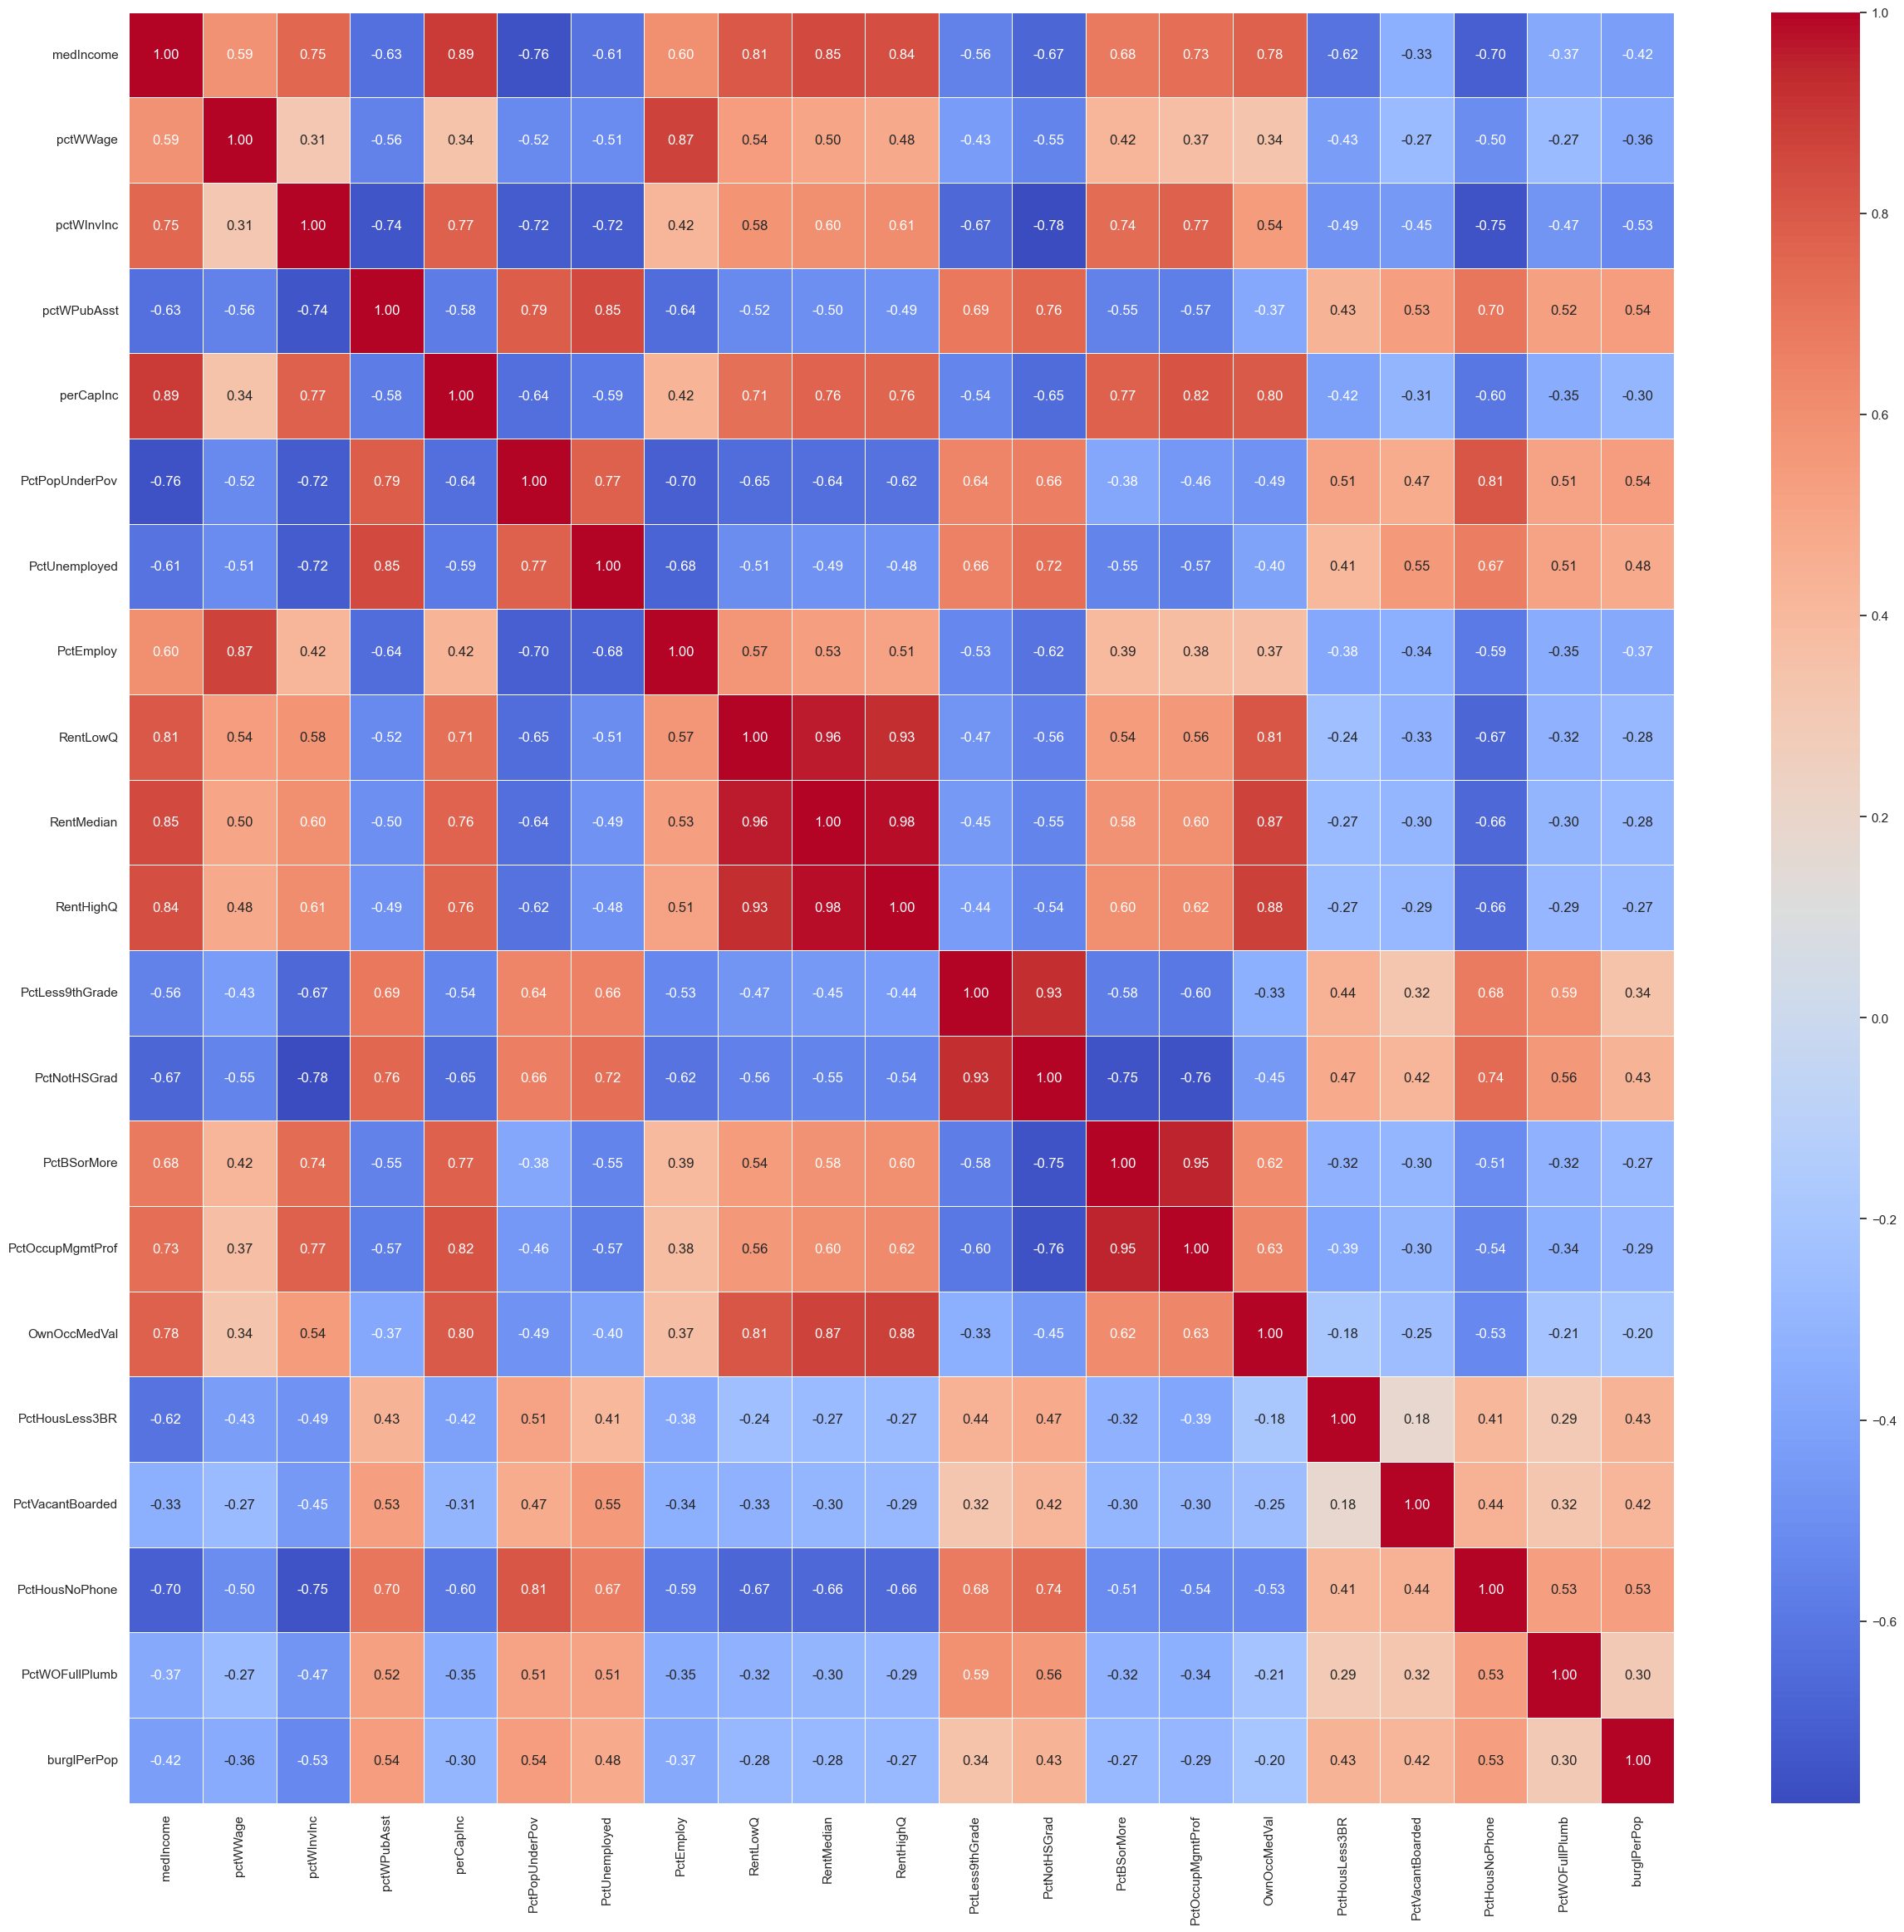

In [75]:
plt.figure(figsize=(30, 28))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
from sklearn.preprocessing import StandardScaler

In [51]:
# Drop the target variable ('burglPerPop') from the DataFrame
X = filtered_df.drop(columns=['burglPerPop'])

# Standardize the data (optional but recommended)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Create a DataFrame from the scaled data
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = scaled_X.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_X.values, i) for i in range(scaled_X.shape[1])]

print(vif_data)

             Feature        VIF
0          medIncome  30.566813
1           pctWWage   9.400856
2         pctWInvInc   8.188457
3        pctWPubAsst   6.000226
4          perCapInc  14.629863
5     PctPopUnderPov  11.673650
6      PctUnemployed   5.373070
7          PctEmploy   9.025910
8           RentLowQ  18.052244
9         RentMedian  59.320359
10         RentHighQ  30.552578
11   PctLess9thGrade  12.630986
12      PctNotHSGrad  24.573215
13       PctBSorMore  17.548095
14  PctOccupMgmtProf  14.896099
15      OwnOccMedVal   7.044347
16    PctHousLess3BR   3.716888
17  PctVacantBoarded   1.641661
18    PctHousNoPhone   5.006564
19    PctWOFullPlumb   1.696485


In [78]:
filtered_df = filtered_df.dropna()

In [79]:
X = filtered_df.drop(['burglPerPop'], axis=1)
y = filtered_df['burglPerPop']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [81]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [82]:
print(X_train,y_train)

[[-0.69884432 -0.39534151  0.09944882 ... -0.16421505 -0.26598125
   0.25419049]
 [-0.88165212 -2.49194313  0.13298463 ... -0.48407777  1.2603064
   0.62447395]
 [-0.64372981 -0.68286091 -0.49639675 ...  1.53687307  0.0534176
   0.11533419]
 ...
 [-0.43680468 -0.21977657  0.16028122 ... -0.553866   -0.45615767
  -0.50951914]
 [-0.64040328 -0.22868204 -0.60324341 ...  0.38827511  1.16278003
  -0.23180655]
 [ 0.82047147  0.35271781  0.19693664 ... -0.63819344 -0.83894866
  -0.57894729]] [[-0.04792258]
 [-0.33537564]
 [ 1.51748228]
 ...
 [-0.26517466]
 [ 1.04206137]
 [-0.20531835]]


In [83]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
import numpy as np 
from sklearn import metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [84]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 0.4608332307407619
MSE: 0.7192640171481319
RMSE: 0.8480943444854069
